In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [2]:
df= pd.read_csv('red_wine_quality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

#### Data Visualization

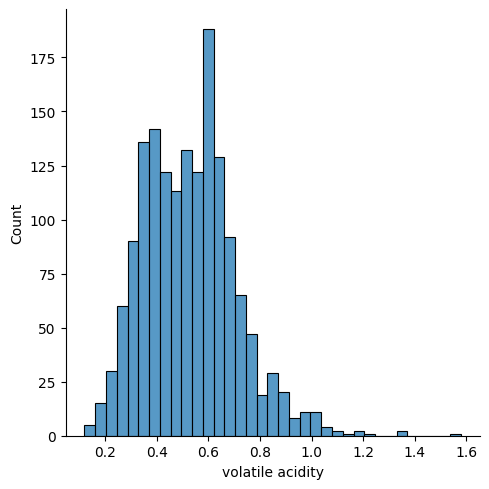

In [8]:
sns.displot(x='volatile acidity',data=df)

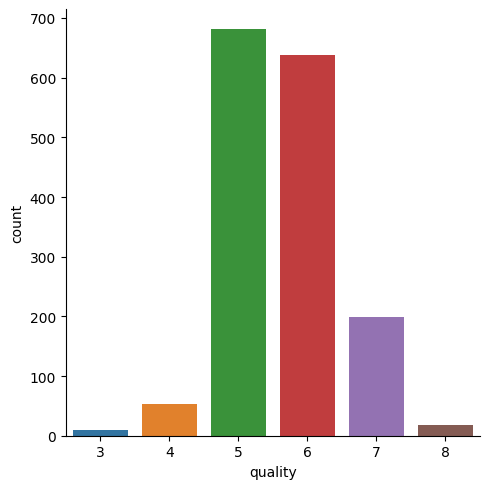

In [9]:
sns.catplot(x='quality', data = df, kind = 'count')

<AxesSubplot: xlabel='quality', ylabel='volatile acidity'>

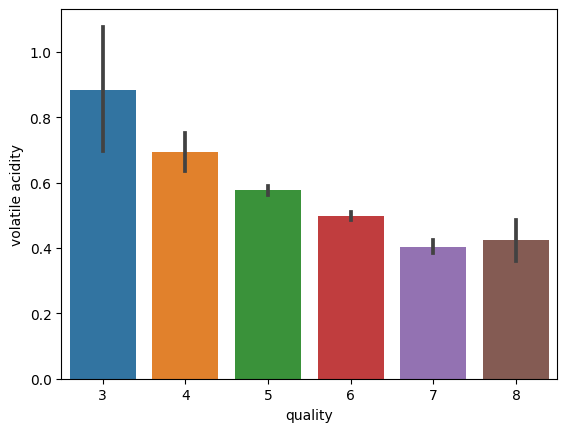

In [10]:
# sns.barplot(x='quality', y='fixed acidity', data=df)
# fixed acidity is not affecting much the targrt but volatile acidity is affectign it
sns.barplot(x='quality', y='volatile acidity', data=df)


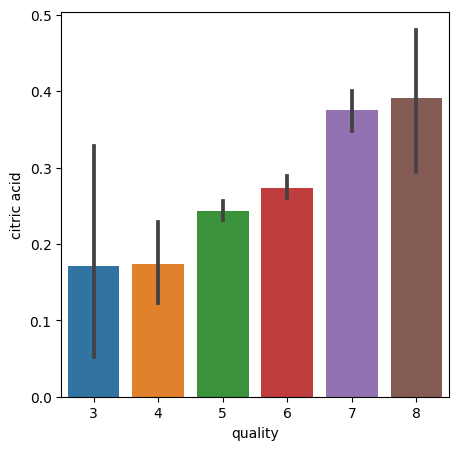

In [38]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
ax=sns.barplot(x='quality', y = 'citric acid', data = df)

### Correlation between the features


In [11]:
correlation = df.corr()

<AxesSubplot: >

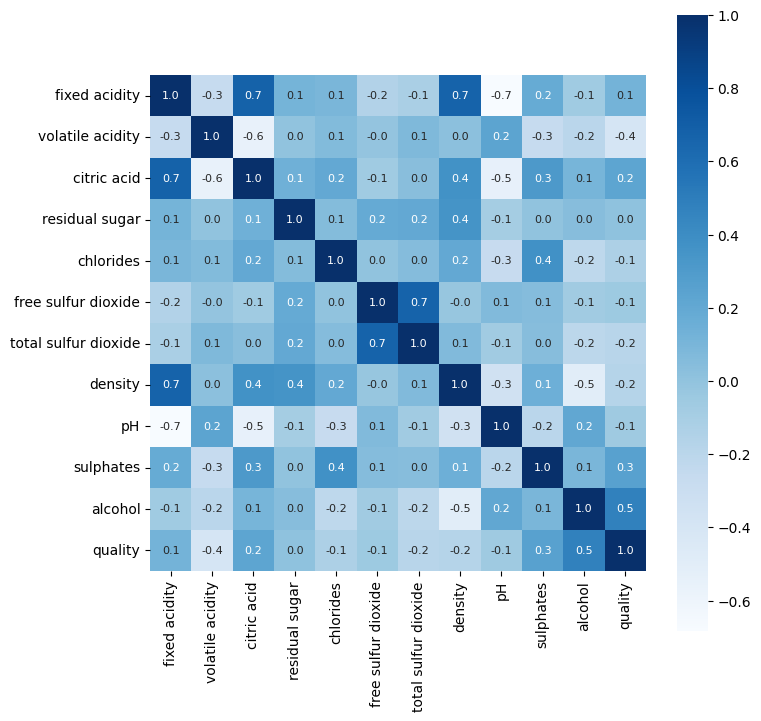

In [12]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', \
            annot = True, annot_kws={'size':8}, cmap = 'Blues')

### Separating Data and Target

In [13]:
X= df.drop('quality',axis=1)

In [14]:
y =df['quality'].apply(lambda val : 1 if val>=7 else 0)
print(y[y==1].head())

7     1
8     1
16    1
37    1
62    1
Name: quality, dtype: int64


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}



In [16]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.864291,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.865541,{'n_estimators': 10}
2,logistic_regression,0.869924,{'C': 5}


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)


In [21]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [22]:
y_pred= model.predict(X_test)

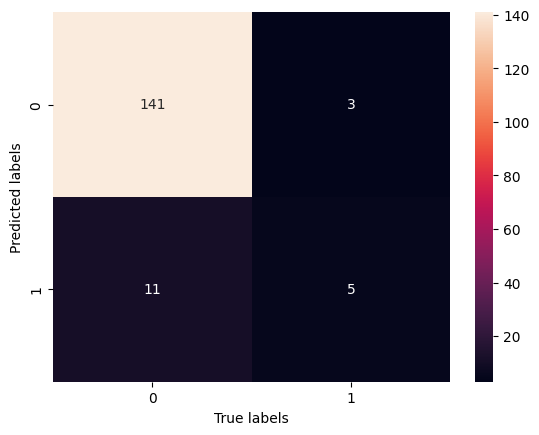

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Predicted labels')
plt.xlabel('True labels')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9125
